# **Analysis**
Hypotheses 3 - 4

### Imports

In [52]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from src.aggregator import DataAggregator
from src.visualization import plot_map

from sklearn.linear_model import LinearRegression
from matplotlib.colors import LinearSegmentedColormap


In [2]:
country_list = [
    "AT", "CY", "CZ", "DE", "DK", "ES", "FR", "GR", "IE", "LU",
    "LV", "MT", "NO", "PL", "RO", "SE", "SI", "SK", "IT", "NL", "FI"
]

new_country_list = [
    "BE", "BA", "BG", "HR", "EE", "HU", "PT", "GB", "LT", "IS", "ME", "XI", "MK"
]

full_country_list = country_list + new_country_list

year_list = list(range(2011, 2024))

exception_list = [
    ("BA", 2011), ("BA", 2012), ("BA", 2013), ("BA", 2014), ("BA", 2015), ("BA", 2016), 
    ("HR", 2011), ("HR", 2012), ("HR", 2013),    
    ("GB", 2021), ("GB", 2022), ("GB", 2023),    
    ("ME", 2011), ("ME", 2012), ("ME", 2013), ("ME", 2014), ("ME", 2015), ("ME", 2016), 
    ("XI", 2011), ("XI", 2012), ("XI", 2013), ("XI", 2014), ("XI", 2015), ("XI", 2016), 
    ("XI", 2017), ("XI", 2018), ("XI", 2019), ("XI", 2020),
    ("MK", 2011), ("MK", 2012), ("MK", 2013), ("MK", 2014), ("MK", 2015), ("MK", 2016), 
    
]

Aggregator instance

In [3]:
aggregator = DataAggregator(data_dir="../data/merged/final_dataset.pkl",
                            milk_dir="../data/merged/milk_3.pkl",
                            butter_dir="../data/merged/butter_3.pkl")

### **3. Sample size vs. detection count**

#### Mandatory programmes

In [4]:
df3 = aggregator.pesticides_sampling_relation(year_list=year_list, country_list=country_list, 
                                              product='both', programme='both')
df3.to_csv('../results/results/3_samples_detected_relation.csv')
df3.head(10)

,sampCountry,year,samples_count,pesticides_samples_count
0,AT,2011,282,2
1,AT,2012,300,3
2,AT,2013,297,0
3,AT,2014,301,2
4,AT,2015,438,16
5,AT,2016,128,0
6,AT,2017,3,0
7,AT,2018,1,0
8,AT,2019,32,0
9,AT,2022,10,10


In [5]:
df3_m = aggregator.pesticides_sampling_relation(year_list=year_list, country_list=country_list, 
                                                product='milk', programme='obligatory')
df3_m.to_csv('../results/results/3_samples_detected_relation_milk.csv')
df3_m.head(10)

,sampCountry,year,samples_count,pesticides_samples_count
0,AT,2013,9,0
1,AT,2016,15,0
2,AT,2019,32,0
3,AT,2022,10,10
4,CY,2013,15,1
5,CY,2016,15,1
6,CY,2019,12,0
7,CY,2022,12,0
8,CZ,2013,16,0
9,CZ,2016,15,0


In [6]:
df3_b = aggregator.pesticides_sampling_relation(year_list=year_list, country_list=country_list, 
                                                product='butter', programme='obligatory')
df3_b.to_csv('../results/results/3_samples_detected_relation_butter.csv')
df3_b.head(10)

,sampCountry,year,samples_count,pesticides_samples_count
0,AT,2012,15,2
1,AT,2015,15,0
2,CY,2012,15,0
3,CY,2015,15,3
4,CZ,2012,18,18
5,CZ,2015,20,18
6,DE,2012,110,55
7,DE,2015,113,43
8,DK,2012,8,0
9,DK,2015,6,0


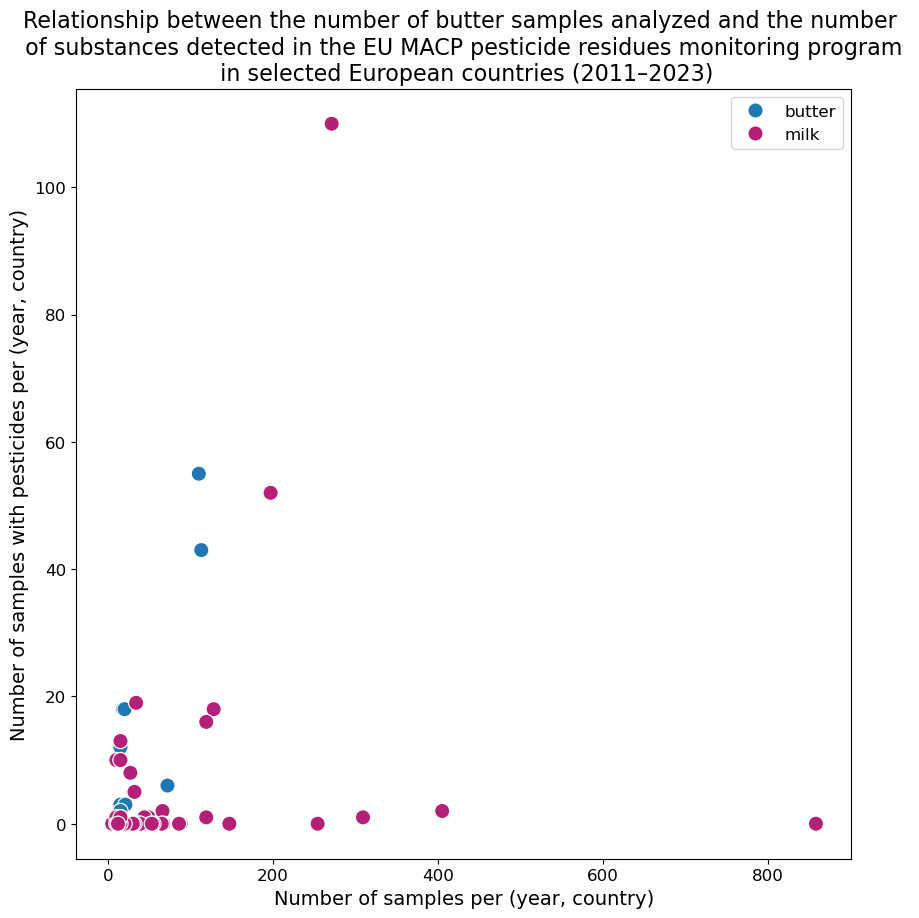

In [13]:
df3_b['product'] = 'butter'
df3_m['product'] = 'milk'
df3_o = pd.concat([df3_b, df3_m], ignore_index=True)

plt.figure(figsize=(10,10))
sns.scatterplot(
    data=df3_o,
    x='samples_count',
    y='pesticides_samples_count',
    hue='product',
    palette={'butter': '#1f77b4', 'milk': '#b41f77'},
    s=120
)
plt.xlabel('Number of samples per (year, country)', fontsize=14)
plt.ylabel('Number of samples with pesticides per (year, country)', fontsize=14)
plt.title('Relationship between the number of butter samples analyzed and the number \n of substances detected in the EU MACP pesticide residues monitoring program \n in selected European countries (2011–2023)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

#### Linear regression

In [14]:
df3_o['percentage_with_pesticides'] = 100 * df3_o['pesticides_samples_count'] / df3_o['samples_count']
df3_m['percentage_with_pesticides'] = 100 * df3_m['pesticides_samples_count'] / df3_m['samples_count']
df3_b['percentage_with_pesticides'] = 100 * df3_b['pesticides_samples_count'] / df3_b['samples_count']

Both

In [16]:
model = LinearRegression()
model.fit(X = df3_o[['samples_count']], y = df3_o[['pesticides_samples_count']])
print(f'R^2 score: {model.score(X = df3_o[['samples_count']], y = df3_o[['pesticides_samples_count']]):.2f}')
print(f'Coefficient: {model.coef_}')

R^2 score: 0.07
Coefficient: [[0.03552831]]


Milk only 

In [22]:
model = LinearRegression()
model.fit(X = df3_m[['samples_count']], y = df3_m[['pesticides_samples_count']])
print(f'R^2 score: {model.score(X = df3_m[['samples_count']], y = df3_m[['pesticides_samples_count']]):.2f}')
print(f'Coefficient: {model.coef_}')

R^2 score: 0.06
Coefficient: [[0.030563]]


Butter only

In [24]:
model = LinearRegression()
model.fit(X = df3_b[['samples_count']], y = df3_b[['pesticides_samples_count']])
print(f'R^2 score: {model.score(X = df3_b[['samples_count']], y = df3_b[['pesticides_samples_count']]):.2f}')
print(f'Coefficient: {model.coef_}')

R^2 score: 0.45
Coefficient: [[0.29180586]]


#### Correlations 

Both

Pearson

In [34]:
df3_o[['samples_count', 'pesticides_samples_count']].corr(method='pearson')

,samples_count,pesticides_samples_count
samples_count,1.000000,0.260809
pesticides_samples_count,0.260809,1.000000


Spearman

In [33]:
df3_o[['samples_count', 'pesticides_samples_count']].corr(method='spearman')

,samples_count,pesticides_samples_count
samples_count,1.000000,0.266382
pesticides_samples_count,0.266382,1.000000


Milk only 

In [31]:
df3_m[['samples_count', 'pesticides_samples_count']].corr(method='pearson')

,samples_count,pesticides_samples_count
samples_count,1.000000,0.253527
pesticides_samples_count,0.253527,1.000000


Butter only 

In [32]:
df3_b[['samples_count', 'pesticides_samples_count']].corr(method='pearson')

,samples_count,pesticides_samples_count
samples_count,1.000000,0.671667
pesticides_samples_count,0.671667,1.000000


#### Linear model with limits

In [40]:
df3_l = pd.read_csv('../results/results/1_samples_count_milk.csv')
df3_l = df3_l[df3_l['limit'] > 0]
df3_l['fulfilment_of_requirements'] = df3_l['obligaotry_samples'] / df3_l['limit'] * 100 

df3_l = pd.merge(df3_l, df3_m, left_on=['country', 'year'], right_on=['sampCountry', 'year'])

model = LinearRegression()
model.fit(X = df3_l[['fulfilment_of_requirements', 'unique_sample_count', 'year', 'limit']], y = df3_l[['pesticides_samples_count']])
print(f'R^2 score: {model.score(X = df3_l[['fulfilment_of_requirements', 'unique_sample_count', 'year', 'limit']], y = df3_l[['pesticides_samples_count']]):.2f}')
print(f'Coefficient: {model.coef_}')

R^2 score: 0.47
Coefficient: [[-0.01918649  0.10715443 -0.42655386 -0.11861459]]


#### Non-mandatory programmes

In [41]:
df3_m = aggregator.pesticides_sampling_relation(year_list=year_list, country_list=country_list, 
                                                product='milk', programme='voluntary')
df3_m.to_csv('../results/results/3_samples_detected_relation_milk_no.csv')
df3_m.head(10)

,sampCountry,year,samples_count,pesticides_samples_count
0,AT,2011,282,2
1,AT,2012,285,1
2,AT,2013,288,0
3,AT,2014,293,0
4,AT,2015,339,7
5,AT,2016,64,0
6,AT,2017,1,0
7,AT,2019,20,0
8,AT,2022,10,10
9,CY,2011,34,1


In [42]:
df3_b = aggregator.pesticides_sampling_relation(year_list=year_list, country_list=country_list, 
                                                product='butter', programme='voluntary')
df3_b.to_csv('../results/results/3_samples_detected_relation_butter_no.csv')
df3_b.head(10)

,sampCountry,year,samples_count,pesticides_samples_count
0,AT,2014,8,2
1,AT,2015,84,9
2,AT,2016,49,0
3,AT,2017,2,0
4,AT,2018,1,0
5,CZ,2011,15,15
6,CZ,2012,18,18
7,CZ,2013,6,6
8,CZ,2014,9,7
9,CZ,2015,20,18


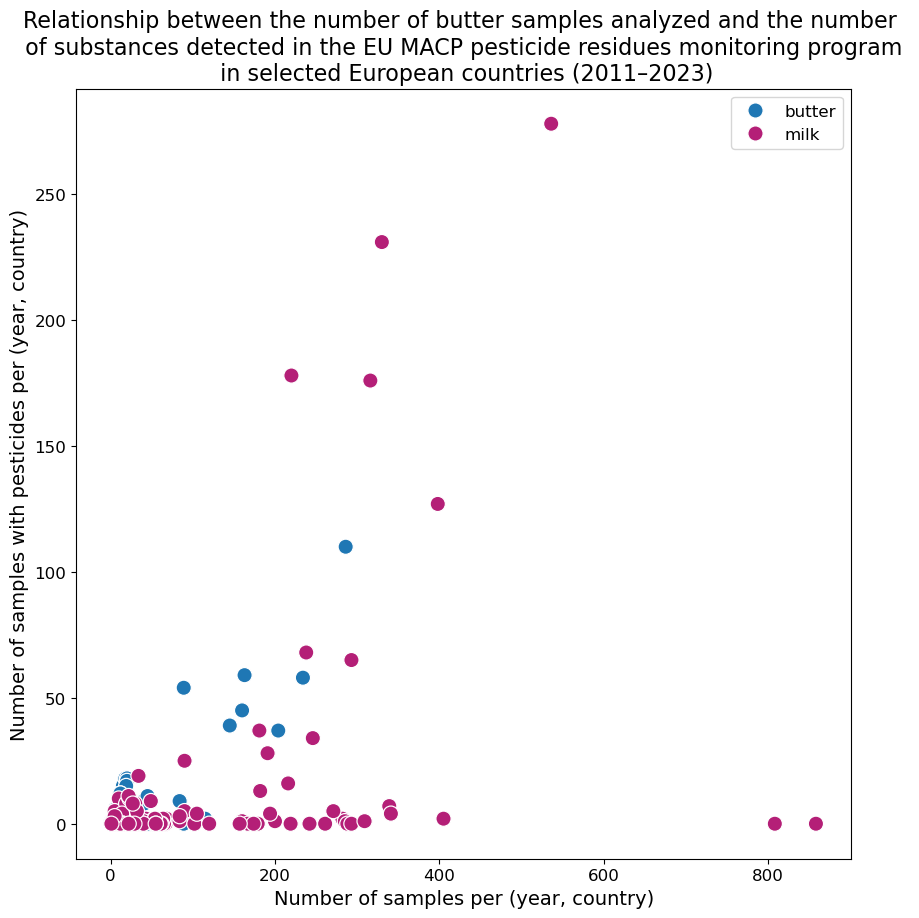

In [43]:
df3_b['product'] = 'butter'
df3_m['product'] = 'milk'
df3_o = pd.concat([df3_b, df3_m], ignore_index=True)

plt.figure(figsize=(10,10))
sns.scatterplot(
    data=df3_o,
    x='samples_count',
    y='pesticides_samples_count',
    hue='product',
    palette={'butter': '#1f77b4', 'milk': '#b41f77'},
    s=120
)
plt.xlabel('Number of samples per (year, country)', fontsize=14)
plt.ylabel('Number of samples with pesticides per (year, country)', fontsize=14)
plt.title('Relationship between the number of butter samples analyzed and the number \n of substances detected in the EU MACP pesticide residues monitoring program \n in selected European countries (2011–2023)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

#### Linear regression

In [44]:
df3_o['percentage_with_pesticides'] = 100 * df3_o['pesticides_samples_count'] / df3_o['samples_count']
df3_m['percentage_with_pesticides'] = 100 * df3_m['pesticides_samples_count'] / df3_m['samples_count']
df3_b['percentage_with_pesticides'] = 100 * df3_b['pesticides_samples_count'] / df3_b['samples_count']

Both

In [45]:
model = LinearRegression()
model.fit(X = df3_o[['samples_count']], y = df3_o[['pesticides_samples_count']])
print(f'R^2 score: {model.score(X = df3_o[['samples_count']], y = df3_o[['pesticides_samples_count']]):.2f}')
print(f'Coefficient: {model.coef_}')

R^2 score: 0.21
Coefficient: [[0.1242168]]


Milk only 

In [46]:
model = LinearRegression()
model.fit(X = df3_m[['samples_count']], y = df3_m[['pesticides_samples_count']])
print(f'R^2 score: {model.score(X = df3_m[['samples_count']], y = df3_m[['pesticides_samples_count']]):.2f}')
print(f'Coefficient: {model.coef_}')

R^2 score: 0.18
Coefficient: [[0.11629725]]


Butter only

In [47]:
model = LinearRegression()
model.fit(X = df3_b[['samples_count']], y = df3_b[['pesticides_samples_count']])
print(f'R^2 score: {model.score(X = df3_b[['samples_count']], y = df3_b[['pesticides_samples_count']]):.2f}')
print(f'Coefficient: {model.coef_}')

R^2 score: 0.71
Coefficient: [[0.27256482]]


#### Correlations 

Both

Pearson

In [48]:
df3_o[['samples_count', 'pesticides_samples_count']].corr(method='pearson')

,samples_count,pesticides_samples_count
samples_count,1.000000,0.455105
pesticides_samples_count,0.455105,1.000000


Spearman

In [49]:
df3_o[['samples_count', 'pesticides_samples_count']].corr(method='spearman')

,samples_count,pesticides_samples_count
samples_count,1.000000,0.411234
pesticides_samples_count,0.411234,1.000000


Milk only 

In [50]:
df3_m[['samples_count', 'pesticides_samples_count']].corr(method='pearson')

,samples_count,pesticides_samples_count
samples_count,1.000000,0.425087
pesticides_samples_count,0.425087,1.000000


Butter only 

In [51]:
df3_b[['samples_count', 'pesticides_samples_count']].corr(method='pearson')

,samples_count,pesticides_samples_count
samples_count,1.000000,0.839893
pesticides_samples_count,0.839893,1.000000


### **Trends in detection**

In [55]:
milk = np.array([[2010, 91.3],
                [2013, 92.3],
                [2016, 93.6],
                [2019, 99.7],
                [2022, 96.9]])
butter = np.array([[2009, 79.5],
                  [2012, 83.4],
                  [2015, 87.2]])

In [56]:
def calculate_changes(x: np.array, col: int, relative: bool = False):
  res = []
  for i in range(len(x)):
    if i != 0:
      if not relative:
        res.append(x[i, col] - x[i-1, col])
      else:
        res.append((x[i, col] - x[i-1, col])/x[i-1, col])
  return res

def print_changes(x: np.array, col: int, year_col: int, title: str):
  abs_changes = calculate_changes(x, col, False)
  relative_changes = calculate_changes(x, col, True)
  print(f'Changes in Percantage of Samples Below LOQ for {title}')
  print('- - -')
  for i in range(len(abs_changes)):
    print(f'Between year {int(x[i+1, year_col])} and {int(x[i, year_col])}: absolute change = {abs_changes[i]:2.2f}, relative change = {relative_changes[i]:2.2f}')
  print('- - -')
  print(f'Average year to year change for {title}: \n absolute change = {np.mean(abs_changes):2.2f}, relative change = {np.mean(relative_changes):2.2f}')
  print('- - -')


#### Changes analysis

In [57]:
print_changes(x = milk, col = 1, year_col = 0, title = 'MILK')

Changes in Percantage of Samples Below LOQ for MILK
- - -
Between year 2013 and 2010: absolute change = 1.00, relative change = 0.01
Between year 2016 and 2013: absolute change = 1.30, relative change = 0.01
Between year 2019 and 2016: absolute change = 6.10, relative change = 0.07
Between year 2022 and 2019: absolute change = -2.80, relative change = -0.03
- - -
Average year to year change for MILK: 
 absolute change = 1.40, relative change = 0.02
- - -


In [58]:
print_changes(x = butter, col = 1, year_col = 0, title = 'BUTTER')


Changes in Percantage of Samples Below LOQ for BUTTER
- - -
Between year 2012 and 2009: absolute change = 3.90, relative change = 0.05
Between year 2015 and 2012: absolute change = 3.80, relative change = 0.05
- - -
Average year to year change for BUTTER: 
 absolute change = 3.85, relative change = 0.05
- - -


#### Linear model

In [59]:
model_m = LinearRegression()
model_m.fit(X = milk[:, 0].reshape(-1, 1), y = milk[:, 1])
print(f'R^2 score: {model_m.score(X = milk[:, 0].reshape(-1, 1), y = milk[:, 1]):.2f}')
print(f'Coefficient: {model_m.coef_}')


R^2 score: 0.72
Coefficient: [0.62]


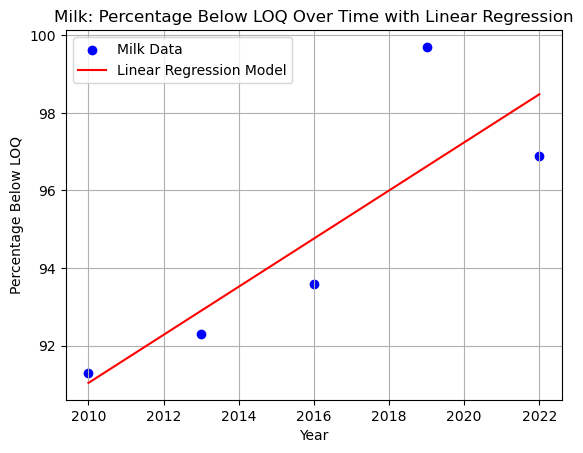

In [60]:
plt.scatter(milk[:, 0], milk[:, 1], label='Milk Data', color = 'blue')
plt.plot(milk[:, 0], model_m.predict(milk[:, 0].reshape(-1, 1)), color='red', label='Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('Percentage Below LOQ')
plt.title('Milk: Percentage Below LOQ Over Time with Linear Regression')
plt.grid(True)
plt.legend()
plt.show()

There is no sense in fitting linear model to butter data, as there are only 3 points.